In [ ]:
from mace.calculators import mace_mp
from ase import build

from ase.md import Langevin
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase import units
from ase import Atoms
from ase.build import bulk
from ase.visualize import view
import numpy as np
import matplotlib.pyplot as plt
from ase.build import add_vacuum
from ase.optimize import LBFGS, BFGS
from ase import Atom

from ase.io.trajectory import Trajectory
from ase.md import Langevin, Bussi
from ase import io

plt.rcParams.update({
    "font.family": "serif",       
    "font.size": 12,              
    "axes.labelsize": 14,         
    "axes.titlesize": 16,         
    "xtick.labelsize": 12,        
    "ytick.labelsize": 12,       
    "legend.fontsize": 12,      
    "text.usetex": True       
})


#macemp = mace_mp(dispersion=True, default_dtype="float64")
macemp_omat = mace_mp(model="/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/mace-omat-0-medium.model", dispersion=True, default_dtype="float64")


Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.
Using TorchDFTD3Calculator for D3 dispersion corrections


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


In [39]:
import importlib
import interlayer_spacing
importlib.reload(interlayer_spacing)

from interlayer_spacing import calculate_interlayer_spacing, set_interlayer_spacing

In [40]:
mg_traj = io.read("trajectories/mg_omat_25000.traj", ":")
mgo_traj = io.read("trajectories/mgo_omat_25000.traj", ":")
mgoh_traj = io.read("trajectories/mgoh_omat_25000.traj", ":")

In [111]:
mg_traj = io.read("trajectories/mg_omat_flipped_25000.traj", ":")
mgo_traj = io.read("trajectories/mgo_omat_flipped_25000.traj", ":")
mgoh_traj = io.read("trajectories/mgoh_omat_flipped_25000.traj", ":")

In [44]:
# recorded every 10 steps = 10 fs
len(mg_traj), len(mgo_traj), len(mgoh_traj)

(2501, 2501, 2501)

Paper doesn't include first 5000 steps: 5 ps pre-equilibration and 20 ps production run

In [112]:
interlayer_spacing_mg = []
interlayer_spacing_mgo = []
interlayer_spacing_mgoh = []

for frame_mg, frame_mgo, frame_mgoh in zip(mg_traj[500:], mgo_traj[500:], mgoh_traj[500:]):
    interlayer_spacing_mg.append(calculate_interlayer_spacing(frame_mg))
    interlayer_spacing_mgo.append(calculate_interlayer_spacing(frame_mgo))
    interlayer_spacing_mgoh.append(calculate_interlayer_spacing(frame_mgoh))

In [67]:
time_ps = np.arange(0, len(mg_traj[500:])*10, 10) / 1000

- Although we don't see as much variation in the interlayer spacing as in the paper, the conclusion is the same: the heterostrucutres stability oscillates about the interlayer spacing with the largest adhesion energy

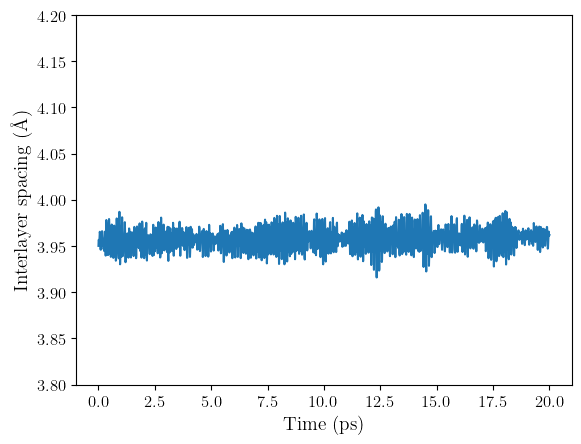

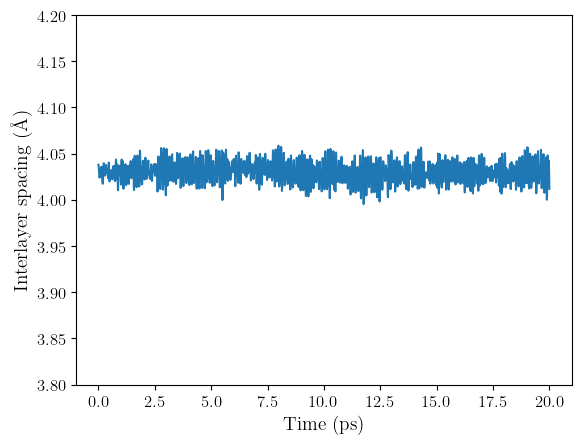

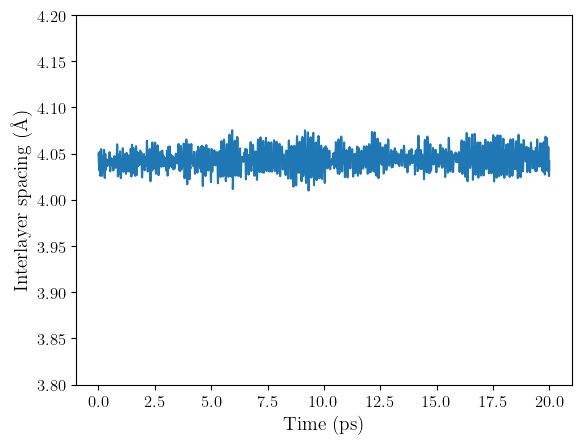

In [113]:
#fig = plt.figure(figsize=(6, 4))
plt.plot(time_ps, interlayer_spacing_mg, label="M_G")
plt.ylabel(r"Interlayer spacing ($\mathrm{\AA}$)")
plt.xlabel("Time (ps)")
plt.ylim(3.8, 4.2)
plt.show()

plt.plot(time_ps, interlayer_spacing_mgo, label="M_GO")
plt.ylabel(r"Interlayer spacing ($\mathrm{\AA}$)")
plt.xlabel("Time (ps)")
plt.ylim(3.8, 4.2)
plt.show()

plt.plot(time_ps, interlayer_spacing_mgoh, label="M_GOH")
plt.ylabel(r"Interlayer spacing ($\mathrm{\AA}$)")
plt.xlabel("Time (ps)")
plt.ylim(3.8, 4.2)
plt.show()


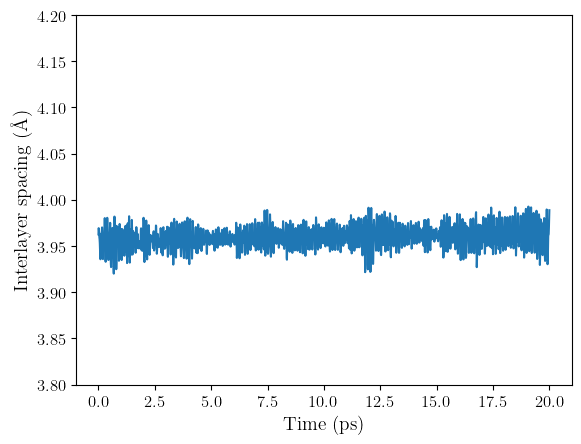

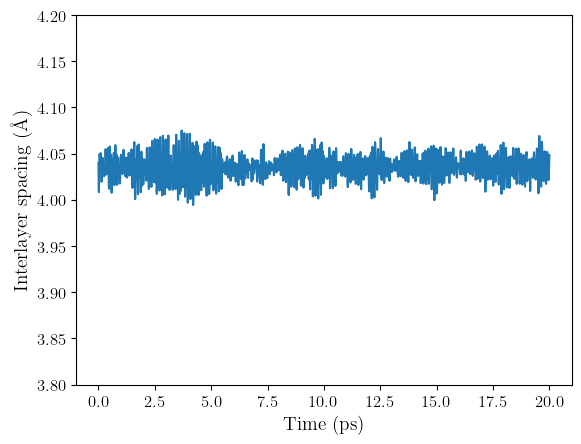

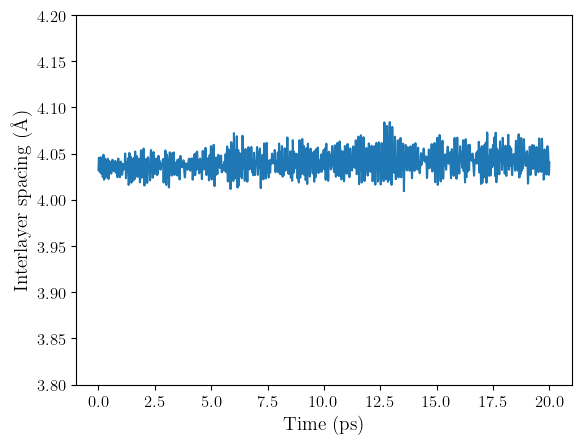

In [110]:
#fig = plt.figure(figsize=(6, 4))
plt.plot(time_ps, interlayer_spacing_mg, label="M_G")
plt.ylabel(r"Interlayer spacing ($\mathrm{\AA}$)")
plt.xlabel("Time (ps)")
plt.ylim(3.8, 4.2)
plt.show()

plt.plot(time_ps, interlayer_spacing_mgo, label="M_GO")
plt.ylabel(r"Interlayer spacing ($\mathrm{\AA}$)")
plt.xlabel("Time (ps)")
plt.ylim(3.8, 4.2)
plt.show()

plt.plot(time_ps, interlayer_spacing_mgoh, label="M_GOH")
plt.ylabel(r"Interlayer spacing ($\mathrm{\AA}$)")
plt.xlabel("Time (ps)")
plt.ylim(3.8, 4.2)
plt.show()
